In [1]:
%load_ext autoreload
%autoreload 2
from robot_arms import *
import numpy as np
import jacobian
import matplotlib.pyplot as plt
from matplotlib import patches
import trajectory_planning
import angular_velocity_for_movement
import forward_kinematics

In [25]:
lin_velocities = np.array(((0,0,0), (0,-27, 0), (0,0,-27), (0,27,0), (0,0,0)))
matricies = trajectory_planning.circle_path(n_knots = 7, lin_velocities=lin_velocities, angular_velocities_func= angular_velocity_for_movement.omega_given_circle)

0.0
[150.  32. 120.]
[0.97799284 0.20863847 0.        ]
[[ 9.77992836e-01 -8.64471745e-16  2.08638472e-01  1.50000000e+02]
 [ 2.08638472e-01 -1.82139081e-16 -9.77992836e-01  3.20000000e+01]
 [ 8.79774703e-16  1.00000000e+00  0.00000000e+00  1.20000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[150.          16.         147.71281292]
[0.9943592  0.10606498 0.        ]
1.0471975511965976
[150.          16.         147.71281292]
[0.9943592  0.10606498 0.        ]
[[ 9.94359201e-01 -3.59112193e-15  1.06064981e-01  1.50000000e+02]
 [ 1.06064981e-01 -3.83327482e-16 -9.94359201e-01  1.60000000e+01]
 [ 3.59837540e-15  1.00000000e+00  0.00000000e+00  1.47712813e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[150.         -16.         147.71281292]
[ 0.9943592  -0.10606498  0.        ]
2.0943951023931953
[150.         -16.         147.71281292]
[ 0.9943592  -0.10606498  0.        ]
[[ 9.94359201e-01 -4.23548449e-15 -1.06064981e-01  1.50000

IndexError: index 5 is out of bounds for axis 0 with size 5

In [23]:
k = []
for matrix in matricies:
    for i in np.linspace(0, 2, 50):
        angles = matrix @ trajectory_planning.position_t_array(i)
        t = forward_kinematics.T04(*angles)
        k.append((t[1,3], t[2, 3]))
k = np.array(k)

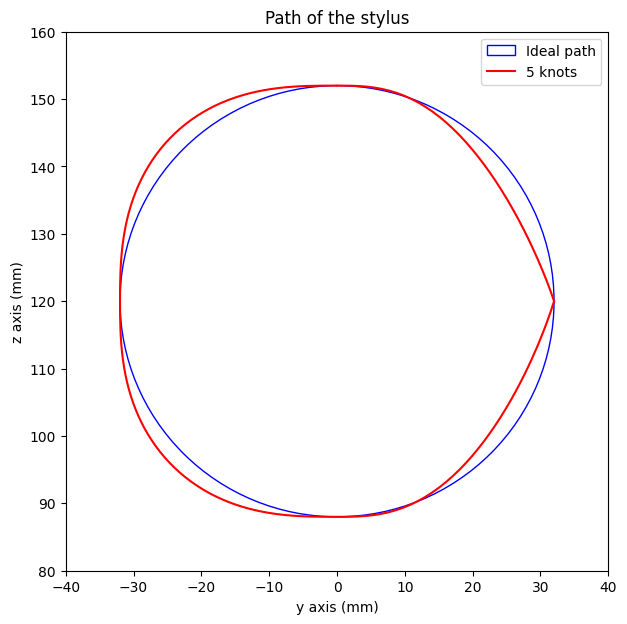

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.set_title("Path of the stylus")
circle2 = patches.Circle((0, 120), 32, color='b', fill=False)
ax.add_patch(circle2)
ax.set_xlim((-40, 40))
ax.set_ylim((80, 160))
ax.set_xlabel('y axis (mm)')
ax.set_ylabel('z axis (mm)')
ax.plot(l[:,0], l[:,1], color = 'r')
# ax.plot(k[:,0], k[:,1], color = 'r')

ax.legend(('Ideal path','5 knots'))

# fig.savefig("circle.png")
plt.show()